In [1]:
import argparse
import platform
import subprocess
import numpy as np
import cv2
import IPython
from edgetpu.detection.engine import DetectionEngine
from PIL import Image
from PIL import ImageDraw

In [2]:
# Function to read labels from text files.
def ReadLabelFile(file_path):
  with open(file_path, 'r') as f:
    lines = f.readlines()
  ret = {}
  for line in lines:
    pair = line.strip().split(maxsplit=1)
    ret[int(pair[0])] = pair[1].strip()
  return ret

In [3]:
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [4]:
engine = DetectionEngine('/home/pi/TPU-MobilenetSSD/mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite')
labels = ReadLabelFile('/home/pi/TPU-MobilenetSSD/coco_labels.txt') 
# Open image.
img = Image.open('/home/pi/python-tflite-source/edgetpu/test_data/face.jpg')
draw = ImageDraw.Draw(img)

# Run inference.

In [5]:
ans = engine.DetectWithImage(img, threshold=0.5, keep_aspect_ratio=True, relative_coord=False, top_k=10)
# Display result.
if ans:
    for obj in ans:
        print ('-----------------------------------------')
        if labels:
            print(labels[obj.label_id])
        print ('score = ', obj.score)
        box = obj.bounding_box.flatten().tolist()
        print ('box = ', box)
        # Draw a rectangle.
        draw.rectangle(box, outline='red')

-----------------------------------------
person
score =  0.953125
box =  [435.22399616241455, 37.57809867029605, 1018.9936423301697, 703.4871405449467]
-----------------------------------------
person
score =  0.91015625
box =  [18.41433298587799, 128.7034449370011, 495.911948800087, 704.0713158206664]
-----------------------------------------
person
score =  0.73046875
box =  [856.5372977256775, 187.59353143581447, 1019.3856706619263, 470.0698161470718]


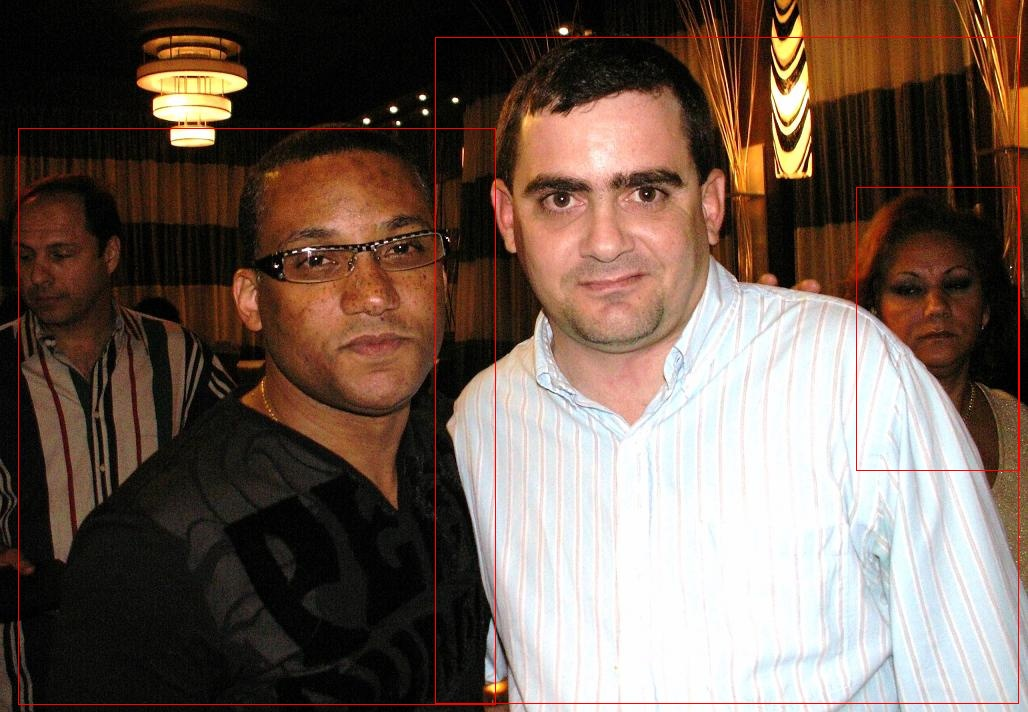

In [7]:
open_cv_image = np.array(img) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
imshow(open_cv_image)